In [1]:
# Import the dependencies

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [2]:
# Read in the data

data = pd.read_csv("data/bombay.csv")
data.head()

,Region,Country,State,City,Month,Day,Year,Temp
0,Asia,India,NaN,Bombay (Mumbai),1,1,1995,71.8
1,Asia,India,NaN,Bombay (Mumbai),1,2,1995,72.0
2,Asia,India,NaN,Bombay (Mumbai),1,3,1995,70.3
3,Asia,India,NaN,Bombay (Mumbai),1,4,1995,69.7
4,Asia,India,NaN,Bombay (Mumbai),1,5,1995,71.3


In [3]:
# Region
data["Region"].unique()

array(['Asia'], dtype=object)

In [4]:
# Country
data["Country"].unique()

array(['India'], dtype=object)

In [5]:
# State
data["State"].unique()

array([nan])

In [6]:
# City
data["City"].unique()

array(['Bombay (Mumbai)'], dtype=object)

In [7]:
# Drop the Region, Country, State, city, and year columns
data.drop(columns=["Region","Country","State","City","Year"], inplace=True)
data.head()

,Month,Day,Temp
0,1,1,71.8
1,1,2,72.0
2,1,3,70.3
3,1,4,69.7
4,1,5,71.3


In [8]:
# Create another temp column composed of the previous day temperatures

yest_temp = data["Temp"]
yest_temp = yest_temp[1:]
data = data[0:len(data)-1]
data["Yest_Temp"] = yest_temp

In [9]:
# Calculate 1st and 3rd quartiles
first_quartile = data["Temp"].quantile(0.25)
third_quartile = data["Temp"].quantile(0.75)

# Interquartile Range
IQR = third_quartile - first_quartile

# Outlier cutoffs
lower_cutoff = first_quartile - 1.5 * IQR
upper_cutoff = third_quartile + 1.5 * IQR

# Remove outliers
data = data.drop(data[data["Temp"] < lower_cutoff].index)
data = data.drop(data[data["Temp"] > upper_cutoff].index)

In [14]:
# Independent variables
X_data = data[["Month","Day","Yest_Temp"]]

# Target variable
y_data = data["Temp"]

In [15]:
# Split the data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.1, random_state=40)

In [16]:
# Create ML mode
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [17]:
# Predict the test data
y_pred = LR.predict(X_test)

In [20]:
# Get Root Mean Squared Error
y_test = list(y_test.values)
y_pred = list(y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
rmse

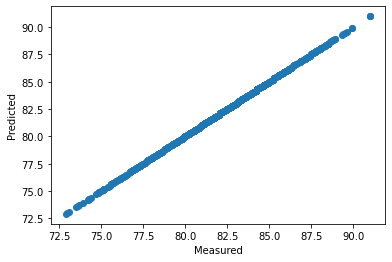

In [22]:
# Plot the predicted values against the actual values
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()